# An Analysis on Wonderland's Class and Social Structures  

Queenie Lau

14 August 2022

DIGHUM150C: Introduction to Computational Literary Analysis

Department of Digital Humanities, University of California, Berkeley

Instructor: Jonathan Reeve

## Abstract
_Alice's Adventures in Wonderland_ by Lewis Caroll follows the adventures of a young girl named Alice who is thrown into the nonsensical world of Wonderland filled with extraordinary anthropomorphic creatures and individuals.  in my final project, I intend to analyze the relationships and interactions between humans and anthropomorphic creatures to illustrate how animals with the most human-like qualities have a higher class standing than animals who don’t. Through the lens of these relationships, we can understand how class and social structures function in Wonderland and where humans reside in the hierarchy.

## Background
Lewis Carroll's Victorian fairy-tale novel _Alice’s Adventures in Wonderland_ (1865) is set during the Victorian period (1837-1901) when Queen Victoria reigned. During this era, Britain had a stable government, a prosperous economy, and shifted from a rural, agricultural society into an urban, industrial one. As for literature, characteristics of Victorian era literature loosely consisted of the following: the shift from Romantic ideals towards realism in literature, the portraying ideal lifestyles and characters, the conveyal of moral purpose, and the relation of humans to the idea of evolution (Characteristics of victorian era literature, novels and poetry).

## Part 1: Cleaning and Preprocessing Text
I first imported the respective libraries and tools which I will be using to analyze the text then split the novel into its respective chapters. Then, I filtered out the text for stop words and created a list of the characters for analysis.

In [1]:
import nltk
from nltk import word_tokenize
import networkx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from urllib import request
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
import spacy
from spacy.lang.en.examples import sentences 
from spacy import displacy
import collections
from itertools import combinations

In [2]:
aliceInWonderland = nltk.corpus.gutenberg.raw('carroll-alice.txt')
aliceInWonderlandWords = [w for w in nltk.corpus.gutenberg.words('carroll-alice.txt') if w.isalpha()]

In [3]:
aliceInWonderlandChapters = {}

In [4]:
chapterOne = aliceInWonderland[69+22:11517]
chapterTwo = aliceInWonderland[11529+20:22513]
chapterThree = aliceInWonderland[22557:32072]
chapterFour = aliceInWonderland[32072+47:45950]
chapterFive = aliceInWonderland[45950+38:57943]
chapterSix = aliceInWonderland[57943+28:71810]
chapterSeven = aliceInWonderland[71810+30:84505]
chapterEight = aliceInWonderland[84505+42:98168]
chapterNine = aliceInWonderland[98168+38:110793]
chapterTen = aliceInWonderland[110793+34:122328]
chapterEleven = aliceInWonderland[122328+34:132727]
chapterTwelve = aliceInWonderland[132727+43:]

chapters = [chapterOne, chapterTwo, chapterThree, chapterFour, 
            chapterFive, chapterSix, chapterSeven, chapterEight, 
            chapterNine, chapterTen, chapterEleven, chapterTwelve]

In [5]:
for index in range(12):
    aliceInWonderlandChapters[index] = chapters[index]

In [6]:
aliceInWonderlandWordsLowered = [token.lower() for token in aliceInWonderlandWords if token.isalpha()]

In [7]:
filteredForStopWords = [word for word in aliceInWonderlandWordsLowered if word not in stopwords.words('english')]

In [8]:
aliceInWonderlandFreqs = nltk.FreqDist(filteredForStopWords)

In [9]:
nlp = spacy.load("en_core_web_lg")

In [10]:
doc = ""
for chapter in aliceInWonderlandChapters:
    doc += aliceInWonderlandChapters[chapter]
aliceInWonderlandDoc = nlp(doc)
aliceInWonderlandSents = list(aliceInWonderlandDoc.sents)

In [32]:
aliceInWonderlandCharacters = ["Alice", "Rabbit", "Duchess", "Mouse", "Lory", 
                               "Eaglet", "Dodo", "Crab", "Canary", "Bill", "Caterpillar",
                              "Pigeon","Footman", "mouse",
                               "Queen", "King", "Cheshire", "Hatter", "courtiers", "flamingo", "hedgehog",
                               "March", "Dormouse", "Two", "Five", "Seven", "soldiers", "Frog", "Fish",
                               "Knave", "Gryphon", "Mock", "Tortoise", "Lobster"]

## Part 2: Visualizing Dependency
Now, after cleaning the text and extracting the chapters, I utilized the networkx library to visualize the relationships between each of the characters. Without pre-existing knowledge about the novel, this visualization paves the path for further analysis and interpretation about the interpersonal relationships between the characters.

In [35]:
graph = networkx.Graph()
graph.add_nodes_from(aliceInWonderlandCharacters)

In [39]:
characterPairs = {pair:0 for pair in list(combinations(aliceInWonderlandCharacters,2))}

In [43]:
for chapter in aliceInWonderlandChapters.values():
    for charPair in characterPairs:
        if charPair[0] in chapter and charPair[1] in chapter:
            characterPairs[charPair] += 1

In [44]:
for pair, weight in characterPairs.items():
    if (weight > 0):
        graph.add_edge(pair[0], pair[1], weight=weight)

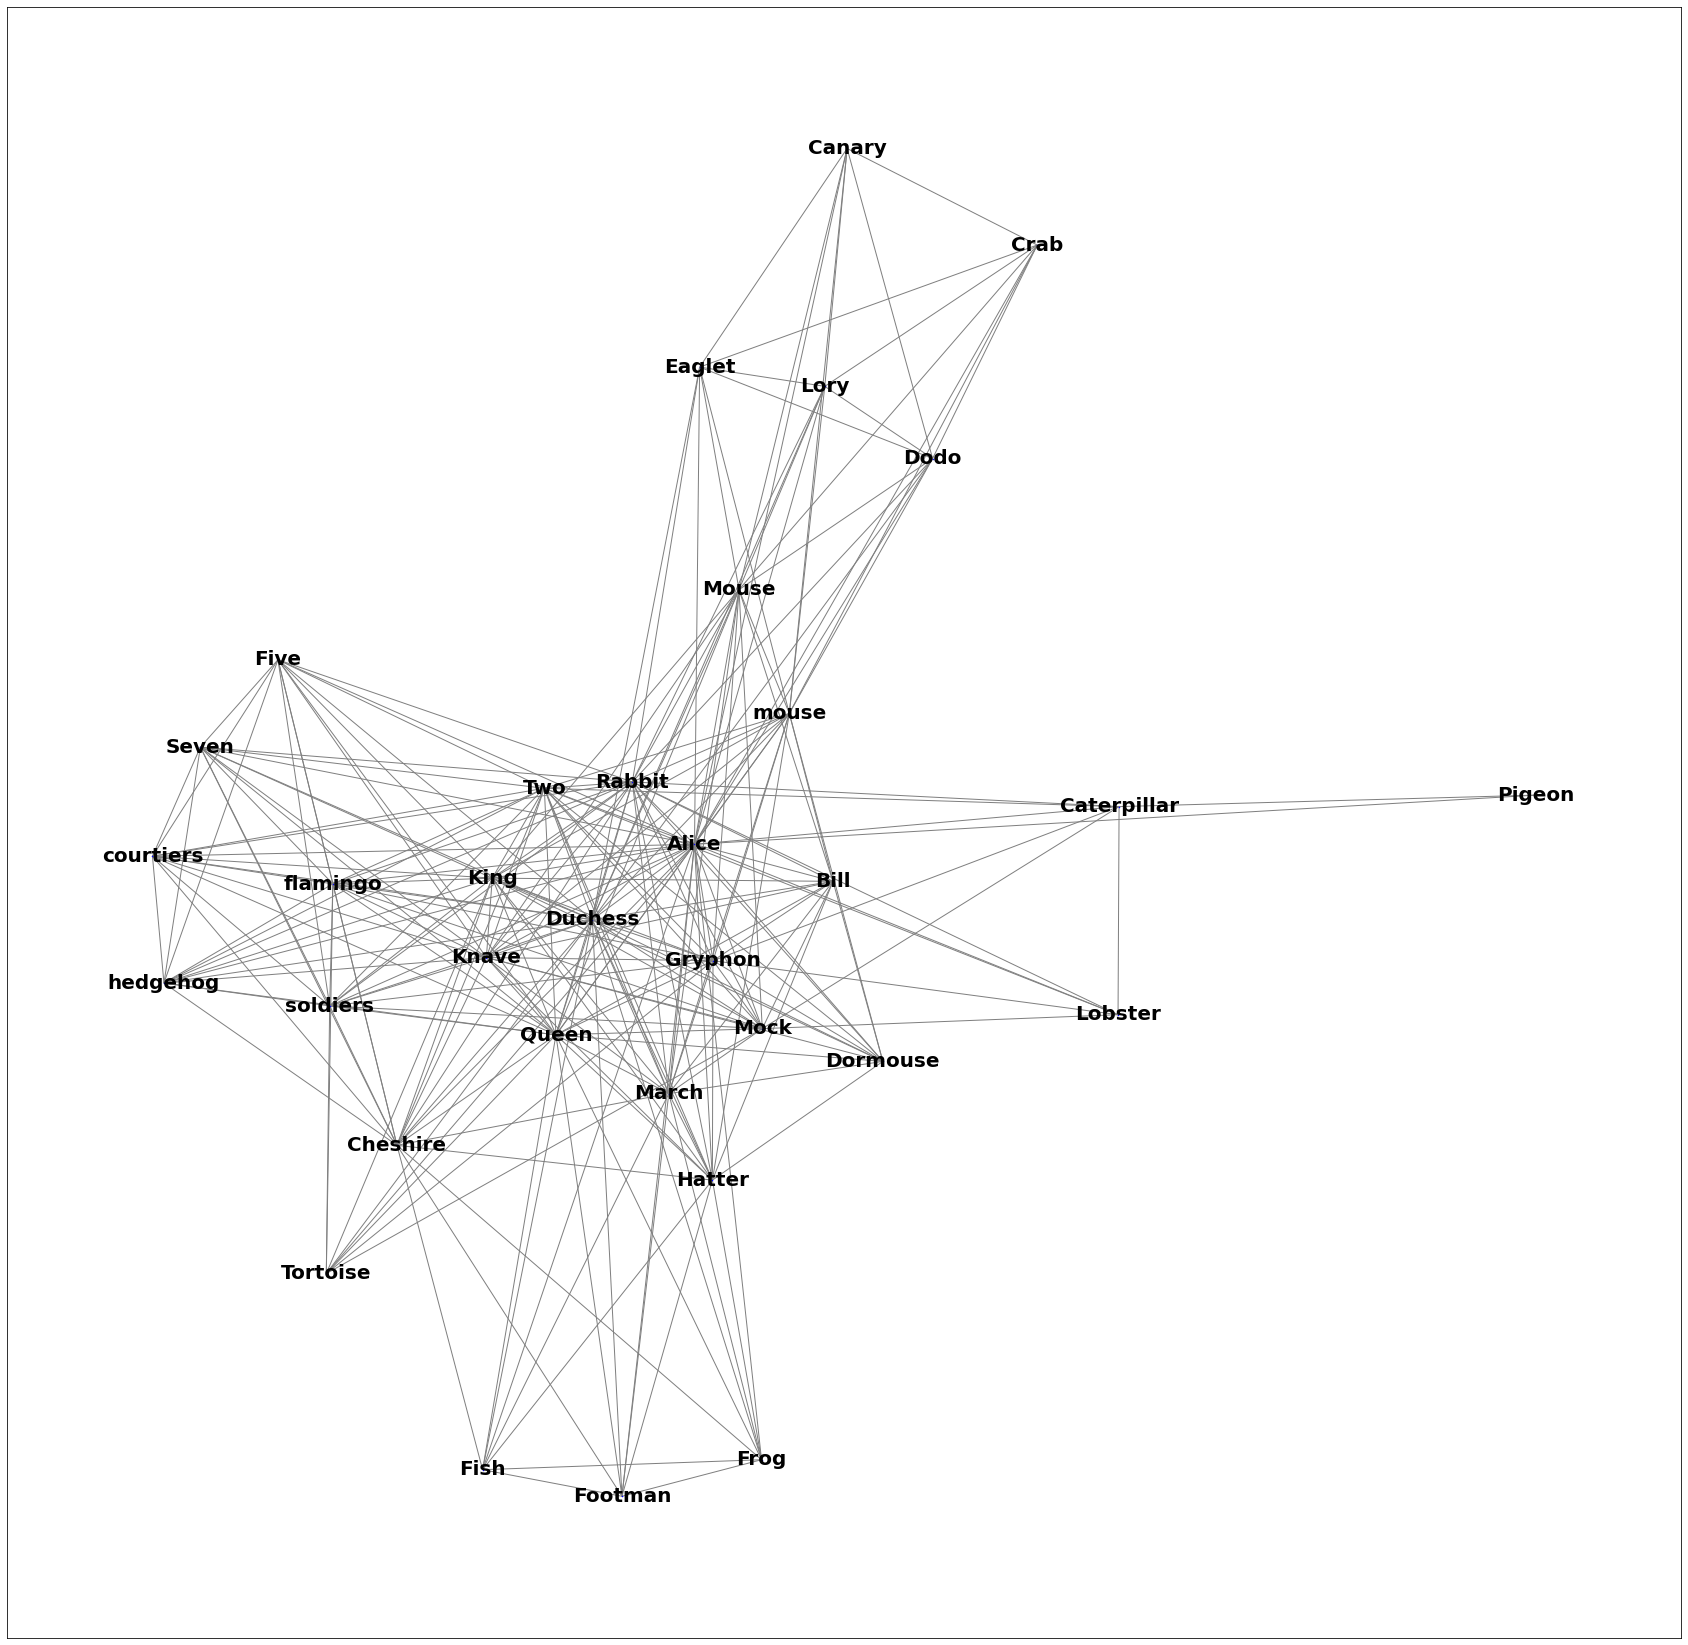

In [45]:
plt.figure(figsize=(30,30))
networkx.draw_networkx(graph,node_size=1,font_size=20,font_weight="bold",linewidths=0.5,font_color="black",edge_color="gray",node_color="blue")

Here, we see how those clustered in the center are characters such as the White Rabbit, the Knave, King, Queen,and the Duchess. On the other hand, characters and creatures farther away from the center are those who aren’t as “connected” to the rest of the characters because they often serve other characters, such as the Queen.

In [46]:
centrality = networkx.eigenvector_centrality(graph)

In [55]:
centralityDict = dict(sorted(centrality.items(), key=lambda item: item[1], reverse=True))

for index,char in enumerate(centralityDict):
    if (index < 5):
        print(f"{char}, {centralityDict[char]}")

Alice, 0.28633518292756127
Duchess, 0.27194725901133954
Rabbit, 0.2595183834611374
Queen, 0.258796758537166
King, 0.2443507236280499


Upon retrieving the centrality of the social network visualization, we see that Alice has the highest value of around 0.27, followed by the Duchess, Alice's cat, the White Rabbit, and finally, the Queen. Given that Alice is the protagonist of the film, it isn't a shock that she is the main protagonist of the novel. Her journey into Wonderland highlights the characters and creatures she meets along the way. As for The Duchess and the White Rabbit, these characters are ones that Alice meets right at the beginnong of the novel.

> It was the White Rabbit, trotting slowly back again, and looking anxiously about as it went, as if it had lost something; and she heard it muttering to itself “The Duchess! The Duchess! Oh my dear paws! Oh my fur and whiskers! She’ll get me executed, as sure as ferrets are ferrets! Where can I have dropped them, I wonder?”) (CHAPTER IV.
The Rabbit Sends in a Little Bill)

Our inplicit introduction to The Duchess is through the White Rabbit as opposed to Alice meetingt the Duchess along her journey. Here, we learn that the White Rabbit serves The Duchess because of his anxiety towards not satisfying the Duchess' needs and desires. As for the Queen and King, these characters rule the kingdom of Wonderland so they are often brought up in trivial conversation.

> The Fish-Footman began by producing from under his arm a great letter, nearly as large as himself, and this he handed over to the other, saying, in a solemn tone, “For the Duchess. An invitation from the Queen to play croquet.” (CHAPTER VI. Pig and Pepper)

In chapter five, the Queen is first mentioned in the novel. Akin to the Duchess, we don't receive a formal introduction to these characters. We learn about their status and characteristics through the lens of other characters. The Queen extending an invitation to the Duchess to play croquet insinuates that the Duchess is of noble status.

These relationships, as shown in the social network visualization, will become clearer as we unconver the roles and internal, social rankings of these characters.

To further analyze character relationships, I created a function to get the sentences involving each of the characters. The function takes in text from a chapter and a characters array. 
Then, I used nltk to get the sentences of each of the chapter and proceeded to iterate through each sentence and checked if any of the words in the sentence matched a character name. Finally, I returned an array of the matched sentences.

In [50]:
def getSentencesInvolvingCharacters(chapter, characters):
    sentences = nltk.sent_tokenize(chapter)
    sentencesInvolvingChars = []
    for sentence in sentences:
        wordsInSentence = nltk.word_tokenize(sentence)
        if any(word in wordsInSentence for word in characters):
            sentencesInvolvingChars.append(sentence)
    return sentencesInvolvingChars

In [61]:
getSentencesInvolvingCharacters(chapterTwo, aliceInWonderlandCharacters)[4]

"It was the White\nRabbit returning, splendidly dressed, with a pair of white kid gloves in\none hand and a large fan in the other: he came trotting along in a great\nhurry, muttering to himself as he came, 'Oh!"

The above is an example of calling the function for sentences in chapter two. In this sentence, we begin to get a glimpse into the human-like qualities that animals in Wonderland possess. Here, the White Rabbit is described as “splendidly dressed” with human accessories. This is important because we’ll later see how other creatures and humans are described in comparison. Having previously learned that the White Rabbit serves the Duchess, we can deduce that the White Rabbit, ranks below the Duchess (a human) in terms of social standing.

In [51]:
aliceInWonderlandProperNouns = [w for w in aliceInWonderlandDoc if w.pos_ == "PROPN"]

In [52]:
chars = [properNoun for properNoun in aliceInWonderlandProperNouns if str(properNoun) in aliceInWonderlandCharacters]

In [56]:
charsDict = {char:[] for char in chars}

for properNoun in charsDict:
    children = [word for word in list(properNoun.children) if word.pos_ == "ADJ"]
    for child in children:
        charsDict[properNoun].append(children)

In [62]:
aliceInwonderlandAdj = [(w, list(w.ancestors)) for w in aliceInWonderlandDoc if w.pos_ == "ADJ"]

In [70]:
def getPartOfSpeechDescribingCharacter(character, partOfSpeechList):
    partOfSpeechDescribingChar = []
    for pair in partOfSpeechList:
        for adj in pair[1]:
            if (character == str(adj)):
                partOfSpeechDescribingChar.append(pair[0])
    return partOfSpeechDescribingChar

In [71]:
def getPartOfSpeechDescribingCharacterCounter(partOfSpeechDescribingChar):
    adjectivesDescribingCharCounter = {}
    for adj in adjectivesDescribingChar:
        if ((str(adj) not in adjectivesDescribingCharCounter)):
            adjectivesDescribingCharCounter[str(adj)] = 1
        else:
             adjectivesDescribingCharCounter[str(adj)] += 1
    return adjectivesDescribingCharCounter

In [72]:
aliceInWonderlandCharactersDict = {}
for char in aliceInWonderlandCharacters:
    adjectivesDescribingChar = list(getPartOfSpeechDescribingCharacter(char, aliceInwonderlandAdj))
    if (len(adjectivesDescribingChar) > 0):
        aliceInWonderlandCharactersDict[char] = getPartOfSpeechDescribingCharacterCounter(adjectivesDescribingChar)

In [76]:
aliceInWonderlandCharactersDict["Alice"]

{'poor': 6,
 'surprised': 1,
 'good': 1,
 'truthful': 1,
 'glad': 1,
 'little': 3,
 'great': 1,
 'confused': 1,
 'last': 1,
 'ready': 1,
 'round': 1,
 'wonderful': 1}

Though the count is quite low for a majority of adjectives describing Alice, we can see that the top two adjectives are “poor” and “little.” It’s slowly becoming clear that Alice, a human girl who’s been educated and accustomed to life in Victorian England, does not possess that same status in Wonderland.


In [77]:
aliceInWonderlandCharactersDict["Rabbit"]

{'pink': 1, 'low': 2, 'hurried': 1}

In [78]:
aliceInWonderlandCharactersDict["Hatter"]

{'silent': 1, 'much': 1, 'pale': 1, 'wretched': 1, 'miserable': 1}

In [80]:
aliceInWonderlandCharactersDict["Queen"]

{'royal': 1, 'savage': 1}

In [81]:
aliceInWonderlandCharactersDict["King"]

{'royal': 1}

In [82]:
aliceInWonderlandCharactersDict["Duchess"]

{'hopeful': 1, 'tis': 2, 'clear': 1, 'ready': 1}

As seen above, we can further extract information regarding character personality trait and social status for characters like the Hatter, The Duchess, Rabbit, Queen, and King.

Interesting enough, we see that the hatter, who is human in Wonderland, being described as “wretched” and “miserable” whereas the Duchess, a noble human resident of Wonderland who gets invited to play croquet with the Queen, doesn’t have any of these negative traits associated with her.

As for adjectives describing the White Rabbit as hurried and the Queen and King as royal, we can’t extract that much information from these, but it’s clear that there isn’t a negative connotation in their descriptors.

Now, let's look into the verbs used by individual characters in the text. 

In [89]:
aliceInWonderlandVerbs = [(w, list(w.children)) for w in aliceInWonderlandDoc if w.pos_ == "VERB"]

In [90]:
aliceInWonderlandCharactersDict = {}
for char in aliceInWonderlandCharacters:
    adjectivesDescribingChar = list(getPartOfSpeechDescribingCharacter(char, aliceInWonderlandVerbs))
    if (len(adjectivesDescribingChar) > 0):
        aliceInWonderlandCharactersDict[char] = getPartOfSpeechDescribingCharacterCounter(adjectivesDescribingChar)

In [91]:
aliceInWonderlandCharactersDict["hedgehog"]

{'give': 1, 'unrolled': 1, 'send': 1, 'croqueted': 1, 'engaged': 1}

In [92]:
aliceInWonderlandCharactersDict["Hatter"]

{'lives': 1,
 'see': 1,
 'said': 22,
 'opened': 1,
 'sighed': 1,
 'grumbled': 1,
 'muttered': 1,
 'shook': 1,
 'continued': 2,
 'went': 4,
 'added': 2,
 'asked': 1,
 'interrupted': 1,
 'looked': 1,
 'trembled': 1,
 'began': 1,
 'replied': 1,
 'dropped': 1,
 'left': 1}

In [93]:
aliceInWonderlandCharactersDict["Mouse"]

{'know': 1,
 'looked': 1,
 'gave': 1,
 'cried': 3,
 'bristling': 1,
 'answer': 1,
 'swimming': 1,
 'heard': 1,
 'said': 7,
 'replied': 1,
 'notice': 1,
 'begged': 1,
 'speaking': 1,
 'growled': 1,
 'shook': 1,
 'changed': 1,
 'splashed': 1}

In [94]:
aliceInWonderlandCharactersDict["Rabbit"]

{'ran': 1,
 'say': 2,
 'TOOK': 1,
 'came': 2,
 'started': 1,
 'noticed': 1,
 'coming': 1,
 'heard': 1,
 'said': 6,
 'recognised': 1,
 'asked': 1,
 'began': 1,
 'whispered': 1,
 'saw': 1,
 'cried': 1,
 'blew': 2,
 'interrupted': 2,
 'watched': 1,
 'read': 1,
 'put': 1,
 'hurried': 1}

In [137]:
aliceInWonderlandCharactersDict["Alice"] = dict(sorted(aliceInWonderlandCharactersDict["Alice"].items(), key=lambda item: item[1], reverse=True))

In [140]:
aliceInWonderlandCharactersDictFiltered = {}

In [145]:
# for index, key in enumerate(aliceInWonderlandCharactersDict["Alice"]):
#     if (index < 5):
#         aliceInWonderlandCharactersDictFiltered[key] = 

In [146]:
aliceInWonderlandCharactersDictFiltered

{}

# Sentiment Analysis to analyze DIALOGUE between Animals + Alice

In [147]:
aliceInWonderlandFreqs.most_common(20)

[('said', 462),
 ('alice', 398),
 ('little', 128),
 ('one', 104),
 ('know', 88),
 ('like', 85),
 ('would', 83),
 ('went', 83),
 ('could', 77),
 ('queen', 75),
 ('thought', 74),
 ('time', 71),
 ('see', 67),
 ('well', 63),
 ('king', 63),
 ('turtle', 59),
 ('began', 58),
 ('way', 56),
 ('hatter', 56),
 ('mock', 56)]

# Extracting Concordance and Collocations

In [148]:
nltkText = nltk.Text(filteredForStopWords)

In [149]:
nltkText.concordance("hatter", lines=10)

Displaying 10 of 56 matches:
t said waving right paw round lives hatter direction waving paw lives march ha
ose raving mad almost wish gone see hatter instead chapter vii mad tea party t
ble set tree front house march hare hatter tea dormouse sitting fast asleep tw
 many three hair wants cutting said hatter looking alice time great curiosity 
al remarks alice said severity rude hatter opened eyes wide hearing said raven
 mean say thing know thing bit said hatter might well say see eat thing eat se
leep thing sleep breathe thing said hatter conversation dropped party sat sile
 remember ravens writing desks much hatter first break silence day month said 
e said fourth two days wrong sighed hatter told butter suit works added lookin
ly replied yes crumbs must got well hatter grumbled put bread knife march hare


In [150]:
nltkText.concordance("queen", lines=10)

Displaying 10 of 75 matches:
aying solemn tone duchess invitation queen play croquet frog footman repeated s
emn tone changing order words little queen invitation duchess play croquet bowe
spoke must go get ready play croquet queen hurried room cook threw frying pan w
lice call like said cat play croquet queen day like much said alice invited yet
spoon march hare great concert given queen hearts sing twinkle twinkle little b
dly finished first verse said hatter queen jumped bawled murdering time head dr
wer beds cool fountains chapter viii queen croquet ground large rose tree stood
e others better talk said five heard queen say yesterday deserved beheaded said
 red rose tree put white one mistake queen find heads cut know see miss best af
xiously looking across garden called queen queen three gardeners instantly thre


In [151]:
freqDist = nltk.FreqDist(aliceInWonderlandWords)

In [152]:
freqDist = nltkText.vocab() 

In [153]:
freqDist.tabulate(12)

   said   alice  little     one    know    like   would    went   could   queen thought    time 
    462     398     128     104      88      85      83      83      77      75      74      71 


In [154]:
finder = nltk.collocations.QuadgramCollocationFinder.from_words(nltkText)
finder.ngram_fd.most_common(30)

[(('join', 'dance', 'join', 'dance'), 4),
 (('beau', 'ootiful', 'soo', 'oop'), 4),
 (('mouse', 'mouse', 'mouse', 'mouse'), 3),
 (('said', 'alice', 'little', 'timidly'), 3),
 (('soo', 'oop', 'e', 'e'), 3),
 (('oop', 'e', 'e', 'evening'), 3),
 (('e', 'e', 'evening', 'beautiful'), 3),
 (('said', 'king', 'white', 'rabbit'), 3),
 (('like', 'might', 'well', 'say'), 2),
 (('pair', 'white', 'kid', 'gloves'), 2),
 (('began', 'thinking', 'children', 'knew'), 2),
 (('oh', 'dear', 'cried', 'alice'), 2),
 (('good', 'deal', 'frightened', 'sudden'), 2),
 (('deal', 'frightened', 'sudden', 'change'), 2),
 (('oh', 'beg', 'pardon', 'cried'), 2),
 (('beg', 'pardon', 'cried', 'alice'), 2),
 (('capital', 'one', 'catching', 'mice'), 2),
 (('edwin', 'morcar', 'earls', 'mercia'), 2),
 (('morcar', 'earls', 'mercia', 'northumbria'), 2),
 (('caterpillar', 'took', 'hookah', 'mouth'), 2),
 (('afraid', 'sir', 'said', 'alice'), 2),
 (('said', 'caterpillar', 'well', 'perhaps'), 2),
 (('alice', 'thought', 'might', 'wel

In [155]:
finder = nltk.collocations.BigramCollocationFinder.from_words(nltkText)
finder.ngram_fd.most_common(90)

[(('said', 'alice'), 123),
 (('mock', 'turtle'), 56),
 (('march', 'hare'), 31),
 (('said', 'king'), 29),
 (('thought', 'alice'), 26),
 (('white', 'rabbit'), 22),
 (('said', 'hatter'), 22),
 (('said', 'mock'), 20),
 (('said', 'caterpillar'), 18),
 (('said', 'gryphon'), 18),
 (('alice', 'said'), 17),
 (('said', 'duchess'), 15),
 (('said', 'cat'), 14),
 (('alice', 'thought'), 13),
 (('said', 'queen'), 13),
 (('minute', 'two'), 12),
 (('poor', 'alice'), 11),
 (('alice', 'could'), 11),
 (('king', 'said'), 11),
 (('oh', 'dear'), 10),
 (('said', 'march'), 10),
 (('poor', 'little'), 9),
 (('might', 'well'), 9),
 (('alice', 'went'), 9),
 (('said', 'mouse'), 9),
 (('alice', 'replied'), 9),
 (('alice', 'looked'), 9),
 (('said', 'dormouse'), 9),
 (('join', 'dance'), 9),
 (('little', 'thing'), 8),
 (('beautiful', 'soup'), 8),
 (('alice', 'began'), 7),
 (('could', 'see'), 7),
 (('like', 'said'), 7),
 (('cried', 'alice'), 7),
 (('alice', 'much'), 7),
 (('alice', 'felt'), 7),
 (('good', 'deal'), 7),
 

In [156]:
finder = nltk.collocations.TrigramCollocationFinder.from_words(nltkText)
finder.ngram_fd.most_common(30)

[(('said', 'mock', 'turtle'), 20),
 (('said', 'march', 'hare'), 10),
 (('poor', 'little', 'thing'), 6),
 (('little', 'golden', 'key'), 5),
 (('certainly', 'said', 'alice'), 5),
 (('white', 'kid', 'gloves'), 5),
 (('march', 'hare', 'said'), 5),
 (('mock', 'turtle', 'said'), 5),
 (('know', 'said', 'alice'), 4),
 (('might', 'well', 'say'), 4),
 (('mouse', 'mouse', 'mouse'), 4),
 (('said', 'caterpillar', 'well'), 4),
 (('said', 'alice', 'said'), 4),
 (('please', 'majesty', 'said'), 4),
 (('join', 'dance', 'join'), 4),
 (('dance', 'join', 'dance'), 4),
 (('beau', 'ootiful', 'soo'), 4),
 (('ootiful', 'soo', 'oop'), 4),
 (('king', 'white', 'rabbit'), 4),
 (('said', 'white', 'rabbit'), 4),
 (('cats', 'eat', 'bats'), 3),
 (('thought', 'poor', 'alice'), 3),
 (('like', 'said', 'alice'), 3),
 (('said', 'alice', 'rather'), 3),
 (('much', 'said', 'alice'), 3),
 (('oh', 'beg', 'pardon'), 3),
 (('indeed', 'said', 'alice'), 3),
 (('alice', 'looked', 'round'), 3),
 (('took', 'hookah', 'mouth'), 3),
 (('

In [157]:
nltkText.concordance("march", lines=20)

Displaying 20 of 34 matches:
es hatter direction waving paw lives march hare visit either like mad want go a
e appear minute two walked direction march hare said live seen hatters said mar
rch hare said live seen hatters said march hare much interesting perhaps may ra
ing perhaps may raving mad least mad march said looked cat sitting branch tree 
e gone much farther came sight house march hare thought must right house chimne
tea party table set tree front house march hare hatter tea dormouse sitting fas
t large arm chair one end table wine march hare said encouraging tone alice loo
e nothing tea see wine remarked said march hare civil offer said alice angrily 
grily civil sit without invited said march hare know table said alice laid grea
ed aloud mean think find answer said march hare exactly said alice say mean mar
rch hare exactly said alice say mean march hare went alice hastily replied leas
t thing eat see might well say added march hare like get thing get like might w
ter suit wo

In [158]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [159]:
nltkText.concordance(["little"])

Displaying 25 of 128 matches:
ing air think could manage ignorant little girl think asking never ask perhaps
ndering ever get suddenly came upon little three legged table made solid glass
ame upon low curtain noticed behind little door fifteen inches high tried litt
ttle door fifteen inches high tried little golden key lock great delight fitte
d would go thought poor alice would little use without shoulders oh wish could
eally impossible seemed use waiting little door went back table half hoping mi
g people like telescopes time found little bottle certainly said alice round n
d large letters well say drink wise little alice going hurry look first said s
her marked poison read several nice little histories children got burnt eaten 
brightened thought right size going little door lovely garden first however wa
aited minutes see going shrink felt little nervous might end know said alice g
poor alice got door found forgotten little golden key went back table found co
gs table slippery tire

In [160]:
sia = SentimentIntensityAnalyzer()

In [161]:
def getPolarityScoreForCharacter(character):
    concordanceList = nltkText.concordance_list([character])
    sentencesRelatedToChar = ""
    for sent in range(len(concordanceList)):
        sentencesRelatedToChar += concordanceList[sent].line
    return sia.polarity_scores(sentencesRelatedToChar)

In [162]:
polarityScoresDict = {}
for char in aliceInWonderlandCharacters:
    polarityScoresDict[char] = getPolarityScoreForCharacter(char)

In [163]:
df = pd.DataFrame.from_dict(polarityScoresDict,orient='index')

In [164]:
df.sort_values(by=['compound'])

,neg,neu,pos,compound
Gryphon,0.224,0.683,0.093,-0.9930
Mock,0.230,0.623,0.146,-0.9874
Hatter,0.131,0.773,0.097,-0.9259
Caterpillar,0.114,0.782,0.104,-0.7968
Lobster,0.146,0.794,0.060,-0.7889
Dormouse,0.125,0.772,0.103,-0.7388
Tortoise,0.135,0.865,0.000,-0.6808
Pigeon,0.155,0.712,0.132,-0.6249
flamingo,0.151,0.741,0.108,-0.4404
Canary,0.185,0.815,0.000,-0.3612


In [165]:
compoundScoresDict = {}
for char in polarityScoresDict:
    for scoreItem in polarityScoresDict[char].items():
        if (scoreItem[0] == 'compound'):
            compoundScoresDict[char] = scoreItem[1]

In [166]:
compoundScoresDictSorted = dict(sorted(compoundScoresDict.items(), key=lambda item: item[1], reverse=True))

In [167]:
compoundScoresDictSorted

{'Duchess': 0.9843,
 'King': 0.9778,
 'Cheshire': 0.9778,
 'March': 0.9493,
 'Queen': 0.9413,
 'Dodo': 0.9326,
 'Five': 0.9273,
 'hedgehog': 0.886,
 'Rabbit': 0.8844,
 'Fish': 0.8476,
 'Seven': 0.8221,
 'soldiers': 0.8126,
 'Mouse': 0.7222,
 'mouse': 0.7222,
 'Footman': 0.6705,
 'Two': 0.6326,
 'Frog': 0.5574,
 'Alice': 0.475,
 'Eaglet': 0.1531,
 'courtiers': 0.0,
 'Crab': -0.069,
 'Lory': -0.1027,
 'Knave': -0.2585,
 'Bill': -0.2698,
 'Canary': -0.3612,
 'flamingo': -0.4404,
 'Pigeon': -0.6249,
 'Tortoise': -0.6808,
 'Dormouse': -0.7388,
 'Lobster': -0.7889,
 'Caterpillar': -0.7968,
 'Hatter': -0.9259,
 'Mock': -0.9874,
 'Gryphon': -0.993}

In [168]:
compoundScoresDictFiltered = {}
for index, char in enumerate(compoundScoresDictSorted):
    if (index < 5) or (index > 29):
        compoundScoresDictFiltered[char] = compoundScoresDictSorted[char]

In [169]:
compoundScoresDictFiltered

{'Duchess': 0.9843,
 'King': 0.9778,
 'Cheshire': 0.9778,
 'March': 0.9493,
 'Queen': 0.9413,
 'Caterpillar': -0.7968,
 'Hatter': -0.9259,
 'Mock': -0.9874,
 'Gryphon': -0.993}

In [170]:
compoundScoresDictFiltered

{'Duchess': 0.9843,
 'King': 0.9778,
 'Cheshire': 0.9778,
 'March': 0.9493,
 'Queen': 0.9413,
 'Caterpillar': -0.7968,
 'Hatter': -0.9259,
 'Mock': -0.9874,
 'Gryphon': -0.993}

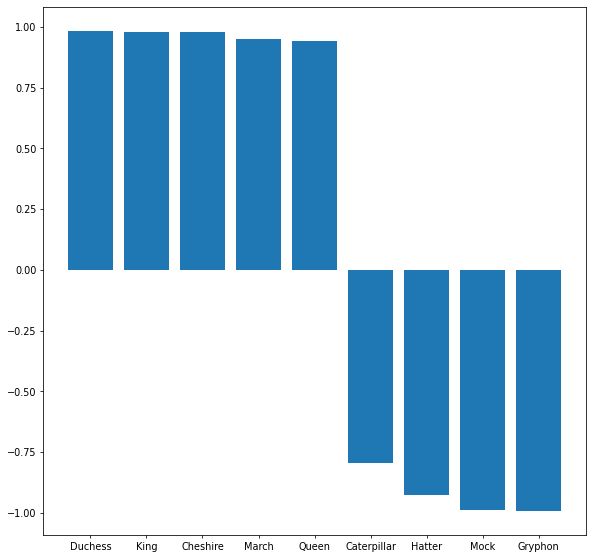

In [171]:
plt.figure(figsize = (10, 10), dpi = 70)
plt.bar(range(len(compoundScoresDictFiltered)), list(compoundScoresDictFiltered.values()), align='center')
plt.xticks(range(len(compoundScoresDictFiltered)), list(compoundScoresDictFiltered.keys()))
plt.show()

The compound score is the sum of positive, negative & neutral scores which is then normalized between -1(most extreme negative) and +1 (most extreme positive).

The more Compound score closer to +1, the higher the positivity of the text.

# Plot sentiment analysis

In [172]:
characterPairs = {pair:0 for pair in list(combinations(aliceInWonderlandCharacters,2))}

In [173]:
for chapter in aliceInWonderlandChapters.values():
    for charPair in characterPairs:
        if charPair[0] in chapter and charPair[1] in chapter:
            characterPairs[charPair] += 1

In [174]:
graph = networkx.Graph()
graph.add_nodes_from(aliceInWonderlandCharacters)

In [175]:
for pair, weight in characterPairs.items():
    if (weight > 0):
        graph.add_edge(pair[0], pair[1], weight=weight)

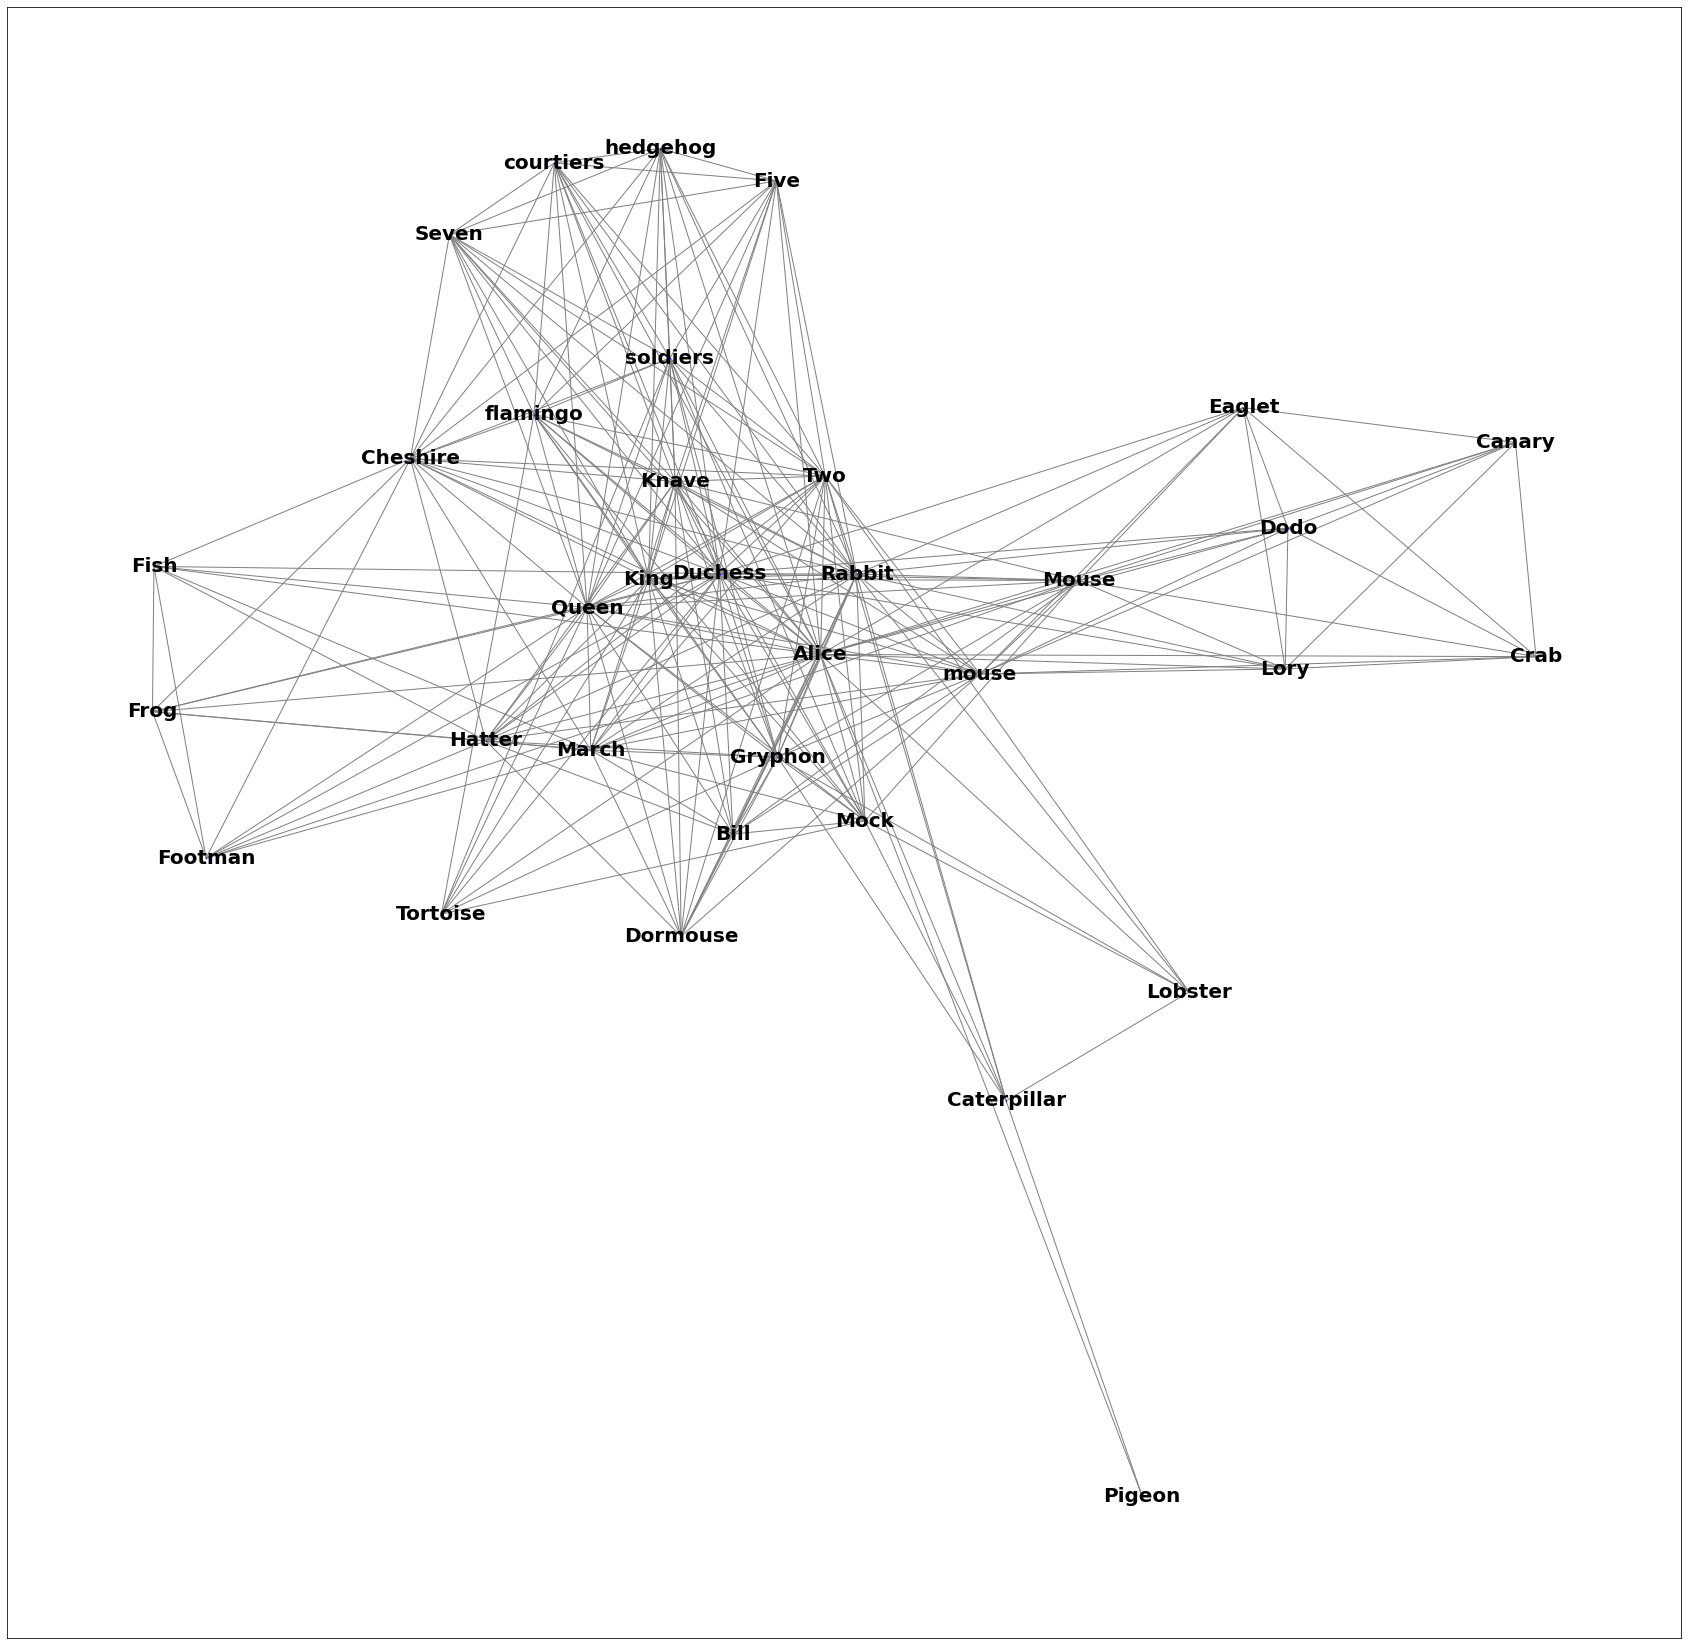

In [176]:
plt.figure(figsize=(30,30))
networkx.draw_networkx(graph,node_size=1,font_size=20,font_weight="bold",linewidths=0.5,font_color="black",edge_color="gray",node_color="blue")

> Testing here lol

In [177]:
centrality = networkx.eigenvector_centrality(graph)

In [178]:
centralityDict = dict(sorted(centrality.items(), key=lambda item: item[1], reverse=True))

for index,char in enumerate(centralityDict):
    if (index < 5):
        print(f"{char}, {centralityDict[char]}")

Alice, 0.28633518292756127
Duchess, 0.27194725901133954
Rabbit, 0.2595183834611374
Queen, 0.258796758537166
King, 0.2443507236280499


# Bibliography